<a href="https://colab.research.google.com/github/adaa1999/Self_Driving_Car/blob/master/SelfDrivingCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self_Driving_Car

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import pickle
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#image augumentation
from imgaug import augmenters as iaa


import os


Using TensorFlow backend.


In [0]:
#accessing the csv file containing steering angle required for training model
file='/content/gdrive/My Drive/Colab Notebooks/SelfDrivingCar/driving_log.csv'

In [0]:
datadir='self_driving_car_data'
column=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,file),names=column)

In [6]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\hp\Desktop\selfDrivingCar\IMG\center_...,C:\Users\hp\Desktop\selfDrivingCar\IMG\left_2...,C:\Users\hp\Desktop\selfDrivingCar\IMG\right_...,0.0,0.0,0.0,7.765627
1,C:\Users\hp\Desktop\selfDrivingCar\IMG\center_...,C:\Users\hp\Desktop\selfDrivingCar\IMG\left_2...,C:\Users\hp\Desktop\selfDrivingCar\IMG\right_...,0.0,0.0,0.0,7.489598
2,C:\Users\hp\Desktop\selfDrivingCar\IMG\center_...,C:\Users\hp\Desktop\selfDrivingCar\IMG\left_2...,C:\Users\hp\Desktop\selfDrivingCar\IMG\right_...,0.0,0.0,0.0,7.362893
3,C:\Users\hp\Desktop\selfDrivingCar\IMG\center_...,C:\Users\hp\Desktop\selfDrivingCar\IMG\left_2...,C:\Users\hp\Desktop\selfDrivingCar\IMG\right_...,0.0,0.0,0.0,7.269198
4,C:\Users\hp\Desktop\selfDrivingCar\IMG\center_...,C:\Users\hp\Desktop\selfDrivingCar\IMG\left_2...,C:\Users\hp\Desktop\selfDrivingCar\IMG\right_...,0.0,0.0,0.0,7.115530


In [0]:
p=data.loc[:,["center","steering"]]

In [8]:
#accessing address of image
p["center"][0].split("\\")[-1]

'center_2019_08_01_20_04_22_402.jpg'

In [0]:
data.center=data.center.apply(lambda x: x.split("\\")[-1])

In [0]:
dt=data.loc[:,["center","steering"]]

In [11]:
len(dt["steering"].unique())

889

In [0]:
num_bins=25
hist,bins=np.histogram(dt['steering'],num_bins)

In [13]:
print(bins[:-1])
print(bins[1:])

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92]
[-0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12 -0.04
  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84  0.92
  1.  ]


In [14]:
print(hist)
print(bins)
center=(bins[:-1]+bins[1:])/2
print(center)

[  77   29   47   45   45   72  113   73   59   32   34   67 5217   14
   15    6   19   31   24   17   18   14    5    8   33]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


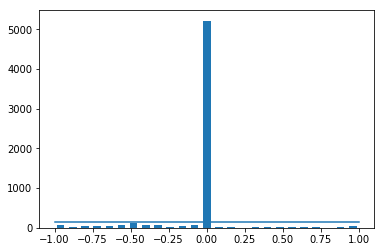

In [15]:
#graph of frequency of steering angle
samples_per_bin=150
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dt['steering']),np.max(dt['steering'])),(samples_per_bin,samples_per_bin))

In [0]:
#p=dt[(dt.steering>=-0.04) & (dt.steering<=0.04)]
#p.count()
#p.index[300:]
#dt.drop(p.index[300:],inplace=True)

In [17]:
dt.count()

center      6114
steering    6114
dtype: int64

In [0]:
#hist,_=np.histogram(dt['steering'],(num_bins))
#plt.bar(center,hist,width=0.05)
#print(hist)
#plt.plot((np.min(dt['steering']),np.max(dt['steering'])),(samples_per_bin,samples_per_bin))

total data: 6114
removed: 5067
remaining: 1047
[ 77  29  47  45  45  72 113  73  59  32  34  67 150  14  15   6  19  31
  24  17  18  14   5   8  33]


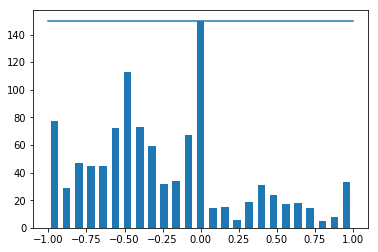

In [19]:
#removing extra data
print('total data:', len(dt))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(dt['steering'])):
    if dt['steering'][i] >= bins[j] and dt['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
dt.drop(dt.index[remove_list], inplace=True)
print('remaining:', len(dt))


#calculating the histogarm for new plot
hist, _ = np.histogram(dt['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
print(hist)
plt.plot((np.min(dt['steering']), np.max(dt['steering'])), (samples_per_bin, samples_per_bin))

In [0]:
def load_img_steering(base_dir,dataframe):
  image_paths=[]
  steering_angle=[]
  #taking dataframe values as numpy array
  center=dataframe.iloc[:,0].values
  angle=dataframe.iloc[:,1].values
  
  #itretting the loop over the whole numpy array
  for i in range(len(dataframe)):
    image_paths.append(os.path.join(base_dir,center[i]))
    steering_angle.append(angle[i])
    
  #returning the list as numpy array
  image_p=np.array(image_paths)
  angle_p=np.array(steering_angle)
  return image_p, angle_p

In [0]:
image_paths,steerings = load_img_steering("/content/gdrive/My Drive/Colab Notebooks/SelfDrivingCar/IMG",dt)

In [22]:
image_paths[0]

'/content/gdrive/My Drive/Colab Notebooks/SelfDrivingCar/IMG/center_2019_08_01_20_04_23_567.jpg'

In [25]:
x_train,x_valid,y_train,y_valid=train_test_split(image_paths,steerings,test_size=0.2,random_state=21)
print('Training Samples:{}\nValid Samples:{}'.format(len(x_train),len(x_valid)))

Training Samples:837
Valid Samples:210


Text(0.5, 1.0, 'Zoomed Image')

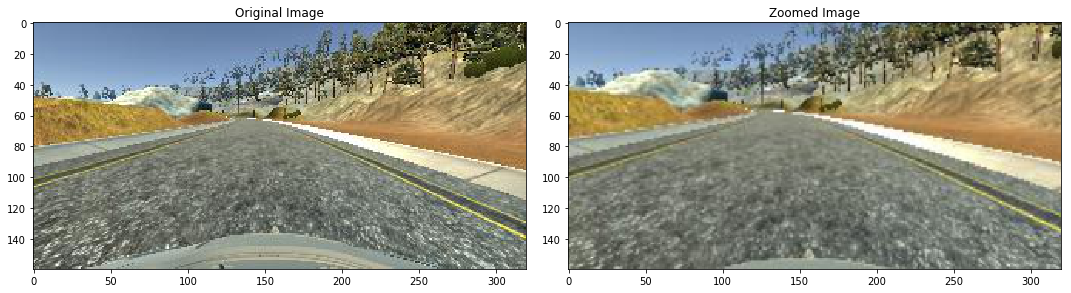

In [26]:
#applying zoom for data
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


#image selection
image = image_paths[random.randint(0, 100)]
original_image = mpimg.imread(image)


#function aplied
zoomed_image = zoom(original_image)


#ploting both image in one canvas
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')
  

Text(0.5, 1.0, 'Panned Image')

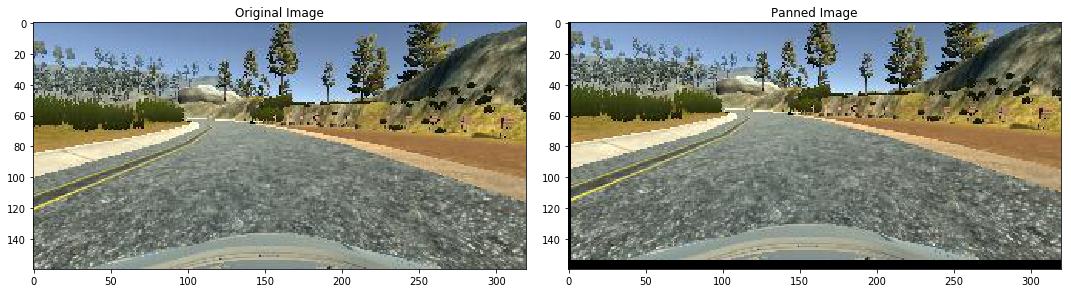

In [27]:
#defination
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

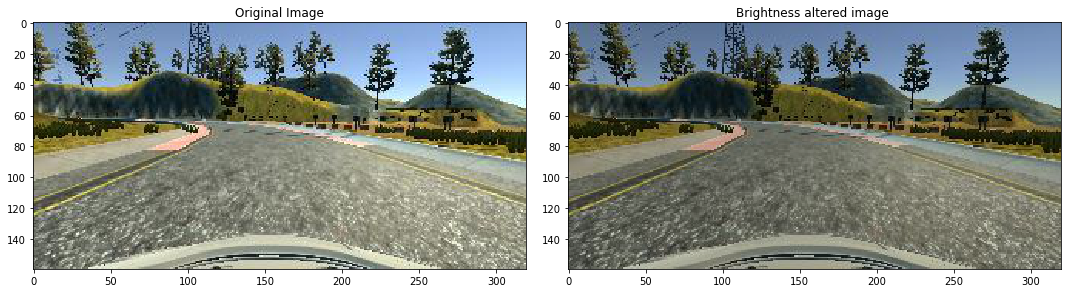

In [28]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
  
  
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.5319689000000001')

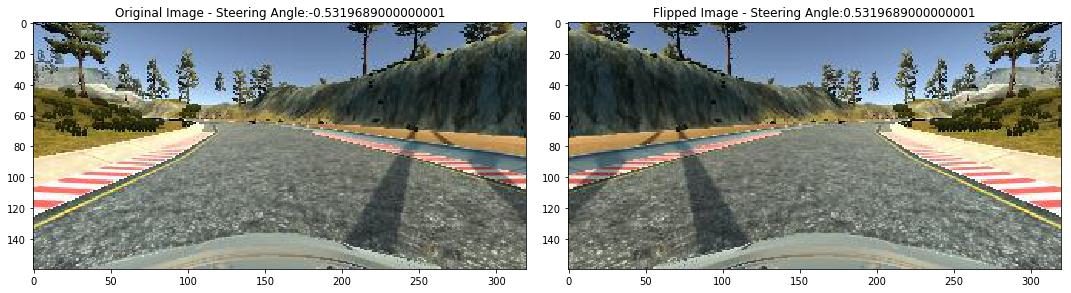

In [29]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
  
  
  
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [30]:
np.random.rand()

0.1380803558186845

In [0]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle


Text(0.5, 1.0, 'Preprocessed Image')

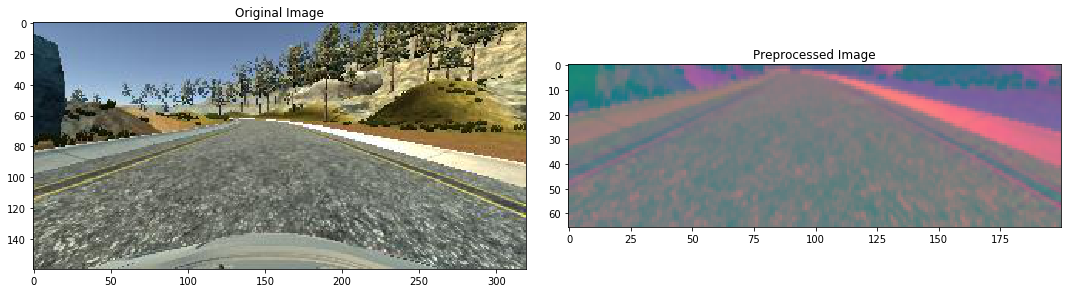

In [32]:
def img_preprocess(img):
    img = img[60:135,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
  
  
  
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [0]:
#multipying number of images--batch generator for creating multiple image from single image
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
      
    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Conv2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Conv2D(64, 3, 3, activation='elu'))
  
  model.add(Conv2D(64, 3, 3, activation='elu'))
  #model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
  return model


In [35]:

from keras.layers.convolutional import Conv2D
model = nvidia_model()
print(model.summary())



W0802 11:57:44.622428 140233735419776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
W0802 11:57:44.668127 140233735419776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 11:57:44.676473 140233735419776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

In [36]:
#training
history = model.fit_generator(batch_generator(x_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=7,
                                  validation_data=batch_generator(x_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

W0802 11:57:46.851952 140233735419776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0802 11:57:47.089046 140233735419776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/7
300/300 [==============================] - 782s 3s/step - loss: 0.2263 - acc: 0.1401 - val_loss: 0.1598 - val_acc: 0.1246
Epoch 2/7
300/300 [==============================] - 520s 2s/step - loss: 0.1850 - acc: 0.1415 - val_loss: 0.1455 - val_acc: 0.1561
Epoch 3/7
300/300 [==============================] - 522s 2s/step - loss: 0.1611 - acc: 0.1533 - val_loss: 0.1397 - val_acc: 0.1670
Epoch 4/7
300/300 [==============================] - 527s 2s/step - loss: 0.1458 - acc: 0.1641 - val_loss: 0.1292 - val_acc: 0.1541
Epoch 5/7
300/300 [==============================] - 521s 2s/step - loss: 0.1418 - acc: 0.1603 - val_loss: 0.1345 - val_acc: 0.1619
Epoch 6/7
300/300 [==============================] - 521s 2s/step - loss: 0.1362 - acc: 0.1642 - val_loss: 0.1285 - val_acc: 0.1426
Epoch 7/7
300/300 [==============================] - 524s 2s/step - loss: 0.1317 - acc: 0.1649 - val_loss: 0.1267 - val_acc: 0.1536


In [0]:
model.save('modelnew.h5')

In [0]:
from google.colab import files
files.download('modelnew.h5')

In [0]:
install following in self
conda install -c conda-forge tensorflow
python-socketio
eventlet
flask
opencv
tensorflow
pillow

#in case socketio doesnot work update both python and socketio

conda create -n "self" python=3.5
activate  self
pip install opencv-python ternsorflow eventlet python-socketio pillow flask keras
pip freeze